In [ ]:
#! pip install sat-search

In [1]:
import folium
import os, shutil
from glob import glob
%matplotlib inline  
import json
import geopandas as gpd
import numpy as np

In [2]:
import satsearch

In [3]:
tr_sentinel_tiles=gpd.read_file('../boundries/sentinel_tr_tiles.shp')

DriverError: ../boundries/sentinel_tr_tiles.shp: No such file or directory

In [ ]:
tr_sentinel_tiles.plot()

In [6]:
band_list=['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'AOT', 'WVP', 'SCL', 'info', 'metadata', 'visual', 'overview', 'thumbnail']

In [7]:
#data from http://geojson.io 
data={
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              38.54827880859375,
              36.90378362619561
            ],
            [
              40.0067138671875,
              36.90378362619561
            ],
            [
              40.0067138671875,
              37.89219554724437
            ],
            [
              38.54827880859375,
              37.89219554724437
            ],
            [
              38.54827880859375,
              36.90378362619561
            ]
          ]
        ]
      }
    }
  ]
}

In [8]:
datajson=json.dumps(data)

In [9]:
target_area=gpd.read_file(datajson)


In [139]:
#intersect target area with landsat path-row 
tiles_intersection = tr_sentinel_tiles[tr_sentinel_tiles.intersects(target_area.geometry[0])]
tiles_intersection.reset_index(drop=True,inplace=True)

In [140]:
tiles_intersection

,name,folders,descriptio,altitude,alt_mode,time_begin,time_end,time_when,GID_0,NAME_0,geometry
0,37SDA,Features,TILE PROPERTIES<br><table border=0 cellpadding...,0.0,None,None,None,None,TUR,Turkey,"POLYGON Z ((37.87506 37.04125 0.00000, 39.1097..."
1,37SDB,Features,TILE PROPERTIES<br><table border=0 cellpadding...,0.0,None,None,None,None,TUR,Turkey,"POLYGON Z ((37.86147 37.94208 0.00000, 39.1110..."
2,37SDC,Features,TILE PROPERTIES<br><table border=0 cellpadding...,0.0,None,None,None,None,TUR,Turkey,"POLYGON Z ((37.84725 38.84331 0.00000, 39.1124..."
3,37SEA,Features,TILE PROPERTIES<br><table border=0 cellpadding...,0.0,None,None,None,None,TUR,Turkey,"POLYGON Z ((38.99978 37.04658 0.00000, 40.2344..."
4,37SEB,Features,TILE PROPERTIES<br><table border=0 cellpadding...,0.0,None,None,None,None,TUR,Turkey,"POLYGON Z ((38.99977 37.94759 0.00000, 40.2493..."
5,37SEC,Features,TILE PROPERTIES<br><table border=0 cellpadding...,0.0,None,None,None,None,TUR,Turkey,"POLYGON Z ((38.99977 38.84900 0.00000, 40.2649..."


In [141]:
item.geometry

{'type': 'Polygon',
 'coordinates': [[[37.88932726171328, 36.05158782950058],
   [37.87507611322617, 37.0412408780802],
   [39.109748061987446, 37.0465232766518],
   [39.10835736650451, 36.05668401100348],
   [37.88932726171328, 36.05158782950058]]]}

In [142]:
# Get the center of the map
xy = np.asarray(target_area.centroid[0].xy).squeeze()
center = list(xy[::-1])
zoom = 7
# Create the most basic OSM folium map
m = folium.Map(location=center, zoom_start=zoom)
# Add the bounds GeoDataFrame in red
m.add_child(folium.GeoJson(target_area.__geo_interface__, name='Area of Study', 
                           style_function=lambda x: {'color': 'red', 'alpha': 0}))
m

C:\Users\akif\.conda\envs\geo\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [143]:
len(tiles_intersection)

6

In [144]:
# Iterate through each Polygon of paths and rows intersecting the area
for i, row in tiles_intersection.iterrows():
    # Create a string for the name containing the path and row of this Polygon
    name = f'ID:{row[0]}' 
    # Create the folium geometry of this Polygon 
    g = folium.GeoJson(row.geometry.__geo_interface__, name=name)
    # Add a folium Popup object with the name string
    g.add_child(folium.Popup(name))
    # Add the object to the map
    g.add_to(m)
    

    
folium.LayerControl().add_to(m)    

m

In [ ]:
# All tile numbes in intersect dataframe
# You can select your tile which you want to drop from list
tiles_list = sorted(tiles_intersection['name'].unique().tolist())
tiles_list

In [ ]:
def drop_tile(df,drop_list):
    tmp=df.copy()
    for t in drop_list:        
        tmp.drop(tmp[tmp.name==t].index, inplace=True)
    tmp.reset_index(inplace=True)
    df=tmp.copy()
    return df

In [ ]:
#drop_list=['37SDA','37SDB']
#tiles_list=drop_tile(tiles_intersection,drop_list)
#tiles_list

In [ ]:
tiles_intersection

In [ ]:
Sentinel-2 Band Information

'B01': {'title': 'Band 1 (coastal) 60m',}
'B02': {'title': 'Band 2 (blue) 10m',}
'B03': {'title': 'Band 3 (green) 10m',}
'B04': {'title': 'Band 4 (red) 10m'  ,}
'B05': {'title': 'Band 5 20m',}
'B06': {'title': 'Band 6 20m',}
'B07': {'title': 'Band 7 20m',}
'B08': {'title': 'Band 8 (nir) 10m',}
'B8A': {'title': 'Band 8A 20m',}
'B09': {'title': 'Band 9  60m',}
'B11': {'title': 'Band 11 (swir16) 20m',}
'B12': {'title': 'Band 12 (swir22) 20m' ,}
'AOT': {'title': 'Aerosol Optical Thickness (AOT) 60m',}
'WVP': {'title': 'Water Vapour (WVP) 10m',}
'SCL': {'title': 'Scene Classification Map (SCL) 20m'}
'info':{'title': 'Scene Info'}
'metadata': {'title': 'Scene Metadata'}
'visual': {'title': '8 bit  RGB image'}
'overview': {'title': 'Low resolution rgb'}
'thumbnail': {'title': 'thumbnail'}

You should give band list to function 

band_list=['B03','B04','B05']


In [ ]:
band_dict={'B01': {'title': 'Band 1 (coastal) 60m',},
'B02': {'title': 'Band 2 (blue) 10m',},
'B03': {'title': 'Band 3 (green) 10m',},
'B04': {'title': 'Band 4 (red) 10m'  ,},
'B05': {'title': 'Band 5 20m',},
'B06': {'title': 'Band 6 20m',},
'B07': {'title': 'Band 7 20m',},
'B08': {'title': 'Band 8 (nir) 10m',},
'B8A': {'title': 'Band 8A 20m',},
'B09': {'title': 'Band 9  60m',},
'B11': {'title': 'Band 11 (swir16) 20m',},
'B12': {'title': 'Band 12 (swir22) 20m' ,},
'AOT': {'title': 'Aerosol Optical Thickness (AOT) 60m',},
'WVP': {'title': 'Water Vapour (WVP) 10m',},
'SCL': {'title': 'Scene Classification Map (SCL) 20m'},
'info':{'title': 'Scene Info'},
'metadata': {'title': 'Scene Metadata'},
'visual': {'title': '8 bit  RGB image'},
'overview': {'title': 'Low resolution rgb'},
'thumbnail': {'title': 'thumbnail'}}

In [ ]:
band_dict.keys()

In [10]:
def find_sentinel(target_aoi,date,tiles_list,max_cloud,band_list):
    URL='https://earth-search.aws.element84.com/v0'
    results = satsearch.Search.search(url=URL,
                                  collections=['sentinel-s2-l2a-cogs'], # note collection='sentinel-s2-l2a-cogs' doesn't work
                                  datetime=date,
                                  bbox=target_aoi,
                                  query={'eo:cloud_cover': {'lt':max_cloud}}, )
    result_list=[]
    for t in tiles_list:
        # query keywords
        tile_number=int(t[0:2])
        lat_band=t[2]
        grid_sq=t[3:]
        items = results.items()
        items.filter('sentinel:utm_zone',[tile_number,])
        items.filter('sentinel:latitude_band',[lat_band])
        items.filter('sentinel:grid_square', [grid_sq])
        selected_item=sorted(items.properties('eo:cloud_cover'))[0]
        #select best image
        items.filter('eo:cloud_cover', [selected_item])
        #print(items.summary(['date', 'id', 'eo:cloud_cover']))
        #items.__getitem__(0)
        tile_dict={'tile_name':t}
        bands_dict={}
        for b in band_list:
            band_url=items.__getitem__(0).assets[b]['href']
            bands_dict[b]=band_url
            
        img_name=items.__getitem__(0).properties['sentinel:product_id']
        imgs_dict={'image_name':img_name,'bands':bands_dict}
        tile_dict[f'tile_images']=imgs_dict        
        result_list.append(tile_dict)
    
    return result_list
            

In [ ]:
tiles_list = sorted(tiles_intersection['name'].unique().tolist())
tiles_list

In [11]:
#bbox = [32.48, -3.24, 36.58, -3.14] # (min lon, min lat, max lon, max lat)
boundry=list(target_area.geometry.bounds.values[0]) #boundry from your AOI
bbox=[boundry[0],boundry[1],boundry[2],boundry[3]] #(min lon, min lat, max lon, max lat)
dates = '2020-07-01/2020-07-12'
band_list=['B02','B03','B04','B08']
cloud_percentage=20

In [12]:
%%time
image_list=find_sentinel(target_aoi=bbox,
                         date=dates,
                         tiles_list=tiles_list[0:3],
                         max_cloud=cloud_percentage,
                         band_list=band_list)

NameError: name 'tiles_list' is not defined

In [ ]:
item.properties

In [ ]:
str(item.properties['sentinel:utm_zone'])+item.properties['sentinel:latitude_band']+item.properties['sentinel:grid_square']

In [ ]:
%history

In [ ]:
image_list

In [ ]:
def find_sentinel_list(target_aoi,date,tiles_list,max_cloud,band_list):
    URL='https://earth-search.aws.element84.com/v0'
    results = Search.search(url=URL,
                                  collections=['sentinel-s2-l2a-cogs'], # note collection='sentinel-s2-l2a-cogs' doesn't work
                                  datetime=date,
                                  bbox=target_aoi,
                                  query={'eo:cloud_cover': {'lt':max_cloud}}, )
    
    
    return results
            

In [ ]:
%%time
sentinel_list=find_sentinel_list(target_aoi=bbox,
                         date=dates,
                         tiles_list=tiles_list[0:3],
                         max_cloud=cloud_percentage,
                         band_list=band_list)


In [ ]:
items = sentinel_list.items()
items

In [ ]:
item=items._items[0]


In [ ]:
item.properties

In [ ]:
a=items.filter('sentinel:product_id',['S2A_MSIL2A_20200711T080611_N0214_R078_T37SDA_20200711T112854','S2A_MSIL2A_20200711T080611_N0214_R078_T37SEA_20200711T112854','S2A_MSIL2A_20200711T080611_N0214_R078_T37SDB_20200711T112854'])
a

In [ ]:
items.properties('sentinel:product_id')

In [ ]:
filenames = items.download

In [ ]:
item=items._items[0]

In [ ]:
## bunlara gore kucuk sorgulama ornekleri yapabiliriz
# kullanici time series icin bu yontem ile goruntu secebilir
item.properties

In [ ]:
%%time
## download a specific asset from all items and put in a directory by date in 'downloads'
## filenames = items.download('metadata', filename_template='downloads/${date}/${id}')
item.download('B08',filename_template='deneme_')

In [ ]:
#oldugu yere id ile kayit
#items.download_assets(filename_template='${id}')
#deefault sentinel s2-l2a-cogs altinda data/id olarak kayit
items.download_assets(filename_template='${date}/${id}')

In [ ]:
items.download('metadata','B08', filename_template='.//${id}_sen')

In [ ]:
item.download(*['info','metadata'])

In [ ]:
item.download('SCL')

In [ ]:
%%time
item.download_assets()

In [ ]:
#bbox = [32.48, -3.24, 36.58, -3.14] # (min lon, min lat, max lon, max lat)
boundry=list(target_area.geometry.bounds.values[0]) #boundry from your AOI
bbox=[boundry[0],boundry[1],boundry[2],boundry[3]] #(min lon, min lat, max lon, max lat)
dates = '2020-07-01/2020-07-12'
band_list=['B02','B03','B04','B08']
cloud_percentage=20

In [ ]:
%%time
image_list_stack=find_sentinel_stack(target_aoi=bbox,
                         date=dates,
                         tiles_list=tiles_list[0:3],
                         max_cloud=cloud_percentage,
                         band_list=band_list)


In [ ]:
image_list_stack.

In [ ]:
image_list_stack[0]

In [ ]:
red_band=image_list[0]['tile_images']['bands']['B02']
red_band

In [ ]:
import rioxarray

%matplotlib inline

In [ ]:
cog_url='https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DB/2020/7/S2A_37SDB_20200701_0_L2A/B04.tif'

In [ ]:
rds = rioxarray.open_rasterio(cog_url, masked=True, chunks=(512,512))

In [ ]:
rds

In [ ]:
#data from http://geojson.io 
data={
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              38.54827880859375,
              36.90378362619561
            ],
            [
              40.0067138671875,
              36.90378362619561
            ],
            [
              40.0067138671875,
              37.89219554724437
            ],
            [
              38.54827880859375,
              37.89219554724437
            ],
            [
              38.54827880859375,
              36.90378362619561
            ]
          ]
        ]
      }
    }
  ]
}

In [ ]:
#data from http://geojson.io 
geometries={
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
        [
              38.8641357421875,
              36.83456911447562
            ],
            [
              39.096221923828125,
              36.83456911447562
            ],
            [
              39.096221923828125,
              37.045312802603355
            ],
            [
              38.8641357421875,
              37.045312802603355
            ],
            [
              38.8641357421875,
              36.83456911447562
            ]
          ]
        ]
      }
    }
  ]
}

In [ ]:
aoi=json.dumps(geometries)
aoi_gpd=gpd.read_file(aoi)


In [ ]:
rds.rio.crs.to_string()

In [ ]:
#https://geopandas.org/projections.html
aoi_gpd=aoi_gpd.to_crs(rds.rio.crs.to_string()) 

In [ ]:
aoi_gpd.geometry.to_json

In [ ]:
aoi_gpd.geometry

In [ ]:
clipped =rds.rio.clip(aoi_gpd.geometry)

In [ ]:
clipped=None
clipped

In [ ]:
item.properties

In [ ]:
ll=[]

In [ ]:
ll.append(clipped.copy())

In [ ]:
red=ll[0]

In [ ]:
red_a=red.persist()

In [ ]:
type(red_a)

In [ ]:
%%time
import rioxarray
import numpy as np

red=red.persist()
nir=red.persist()
den=red.values
den_nir=nir.values
np.seterr(divide='ignore', invalid='ignore')
ndvi = (den_nir.astype(float) - den.astype(float))/(den_nir + den)

In [ ]:
ndvi

In [ ]:
%%time
rds4326 = clipped.rio.reproject("epsg:4326")

In [ ]:
%%time
rds4326.rio.to_raster("RGB.byte.4326.tif")

In [ ]:
cog_url='https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DB/2020/7/S2A_37SDB_20200701_0_L2A/B03.tif'

In [ ]:
rds=None
rds4326=None

In [ ]:
%%time
rds = rioxarray.open_rasterio(cog_url, masked=True, chunks=(256,256))
clipped =rds.rio.clip(aoi_gpd.geometry)
rds4326 = clipped.rio.reproject("epsg:4326")
rds4326.rio.to_raster("RGB.byte256.4326.tif")

In [ ]:
%%time
rds = rioxarray.open_rasterio(cog_url,chunks=(512,512))
clipped =rds.rio.clip(aoi_gpd.geometry)
rds4326 = clipped.rio.reproject("epsg:4326")
rds4326.rio.to_raster("RGB.byte512.4326.tif")


In [ ]:
df[df.data>0.0].to_csv("out.csv", index=False)

In [ ]:
%%time
import rioxarray
import pandas

rds4326 = rds4326.squeeze().drop("spatial_ref").drop("band")
rds4326.name = "data"
df = rds4326.to_dataframe().reset_index()
df[df.data>0.0].to_csv("out.csv", index=False)

In [ ]:
%%time
rds = rioxarray.open_rasterio(cog_url, masked=True, chunks=(1024,1024))
clipped =rds.rio.clip(aoi_gpd.geometry)
rds4326 = clipped.rio.reproject("epsg:4326")
rds4326.rio.to_raster("RGB.byte1024.4326.tif")


In [ ]:
%%time
rds = rioxarray.open_rasterio(cog_url, masked=True, )
clipped =rds.rio.clip(aoi_gpd.geometry)
rds4326 = clipped.rio.reproject("epsg:4326")
rds4326.rio.to_raster("RGB.byteNoChunk.4326.tif")


In [ ]:
type(rds4326)

In [ ]:
from rasterstats import zonal_stats

In [ ]:
rioxarray.open_rasterio?

In [ ]:
rds.variable

In [ ]:
rds.attrs.values()

In [ ]:
client.shutdown()

In [ ]:
#https://stackoverflow.com/questions/53394935/what-is-the-right-way-to-close-a-dask-localcluster
import dask
from dask.distributed import Client
client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
#client = Client(scheduler_port=8787,n_workers=4, threads_per_worker=2, memory_limit='2GB')

client
#client.shutdown()

In [ ]:
image_list=[{'tile_name': '37SDA',
  'tile_images': {'image_name': 'S2A_MSIL2A_20200711T080611_N0214_R078_T37SDA_20200711T112854',
   'bands': {'B02': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DA/2020/7/S2A_37SDA_20200711_0_L2A/B02.tif',
    'B03': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DA/2020/7/S2A_37SDA_20200711_0_L2A/B03.tif',
    'B04': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DA/2020/7/S2A_37SDA_20200711_0_L2A/B04.tif',
    'B08': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DA/2020/7/S2A_37SDA_20200711_0_L2A/B08.tif'}}},
 {'tile_name': '37SDB',
  'tile_images': {'image_name': 'S2B_MSIL2A_20200706T080609_N0214_R078_T37SDB_20200706T113231',
   'bands': {'B02': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DB/2020/7/S2B_37SDB_20200706_1_L2A/B02.tif',
    'B03': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DB/2020/7/S2B_37SDB_20200706_1_L2A/B03.tif',
    'B04': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DB/2020/7/S2B_37SDB_20200706_1_L2A/B04.tif',
    'B08': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DB/2020/7/S2B_37SDB_20200706_1_L2A/B08.tif'}}},
 {'tile_name': '37SDC',
  'tile_images': {'image_name': 'S2B_MSIL2A_20200709T081609_N0214_R121_T37SDC_20200709T114313',
   'bands': {'B02': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DC/2020/7/S2B_37SDC_20200709_0_L2A/B02.tif',
    'B03': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DC/2020/7/S2B_37SDC_20200709_0_L2A/B03.tif',
    'B04': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DC/2020/7/S2B_37SDC_20200709_0_L2A/B04.tif',
    'B08': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/S/DC/2020/7/S2B_37SDC_20200709_0_L2A/B08.tif'}}}]

In [ ]:
red_url=image_list[0]['tile_images']['bands']['B02']
nir_url=image_list[0]['tile_images']['bands']['B08']
red_url

In [ ]:
red_local='B02big.tif'
nir_local='B08big.tif'

In [ ]:
nir_url

In [ ]:
%%time
red_band = rioxarray.open_rasterio(red_url, masked=True, chunks=(512,512))
nir_band = rioxarray.open_rasterio(nir_url, masked=True, chunks=(512,512))

In [ ]:
ndvi

In [ ]:
%%time
ndvi = (nir_band.astype(float) - red_band.astype(float))/(nir_band + red_band)

In [ ]:
%%time
ndvi_export = ndvi.squeeze().drop("spatial_ref").drop("band")
ndvi_export.name = "data"
df = ndvi_export.to_dataframe().reset_index()
df[df.data>0.0].to_csv("ndvi.csv", index=False)

In [ ]:
type(red_band)

In [ ]:
red_band.data

In [ ]:
red_band.attrs

In [ ]:
def calc_ndvi(nir_band,red_band):
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    return ndvi

In [ ]:
import dask
calc_ndvi = dask.delayed(calc_ndvi)

In [ ]:
ndvi_result=calc_ndvi(nir_band,red_band)

In [ ]:
%%time
ndvi2d = ndvi_result.compute().squeeze()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import dask
from dask.distributed import Client
client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
#client = Client(scheduler_port=8787,n_workers=4, threads_per_worker=2, memory_limit='2GB')

client
#client.shutdown()

In [ ]:
%%time
from dask.distributed import Client, LocalCluster
import multiprocessing as mp
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB',timeout="50s")
client
red = xr.open_rasterio('B02big.tif', chunks={'band': 1, 'x': 1024, 'y': 1024})
nir = xr.open_rasterio('B08big.tif', chunks={'band': 1, 'x': 1024, 'y': 1024})
ndvi = (nir - red) / (nir + red)
ndvi2d = ndvi.squeeze()
plt.figure()
im = ndvi2d.compute().plot.imshow(cmap='BrBG', vmin=0, vmax=1)
plt.axis('equal')
plt.show()
client.shutdown()

In [ ]:
from dask.distributed import Client, LocalCluster

In [ ]:
client = Client()
client

In [ ]:
cluster.close()

In [ ]:
cluster = LocalCluster()
cluster

In [ ]:
c

In [ ]:
cluster.status

In [25]:
int(0.6 * mp.cpu_count())

7

In [ ]:
#compare processes=True or false

In [ ]:
%%time
from dask.distributed import Client, LocalCluster
import multiprocessing as mp
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

with LocalCluster(n_workers=int(0.6 * mp.cpu_count()),
    processes=True,
    threads_per_worker=1,
    memory_limit='2GB',
    ip='tcp://localhost:9895',
) as cluster, Client(cluster) as client:
    red = xr.open_rasterio('B02big.tif', chunks={'band': 1, 'x': 1024, 'y': 1024})
    nir = xr.open_rasterio('B08big.tif', chunks={'band': 1, 'x': 1024, 'y': 1024})
    ndvi = (nir - red) / (nir + red)
    ndvi2d = ndvi.squeeze()
    plt.figure()
    im = ndvi2d.compute().plot.imshow(cmap='BrBG', vmin=0, vmax=1)
    plt.axis('equal')
    plt.show()


In [ ]:
%%time
from dask.distributed import Client, LocalCluster
import multiprocessing as mp
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray
%matplotlib inline

with LocalCluster(n_workers=int(0.6 * mp.cpu_count()),
    processes=True,
    threads_per_worker=1,
    memory_limit='2GB',
    #ip='tcp://localhost:9895',
) as cluster, Client(cluster) as client:
    red_band = rioxarray.open_rasterio(red_url, masked=True, chunks=(1024,1024))
    nir_band = rioxarray.open_rasterio(nir_url, masked=True, chunks=(1024,1024))
    ndvi = (nir_band.astype(float) - red_band.astype(float))/(nir_band + red_band)
    ndvi2d = ndvi.squeeze()
    plt.figure()
    im = ndvi2d.compute().plot.imshow(cmap='BrBG', vmin=0, vmax=1)
    plt.axis('equal')
    plt.show()

In [ ]:
%%time
from dask.distributed import Client, LocalCluster
import multiprocessing as mp
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray
%matplotlib inline

with LocalCluster(n_workers=int(0.6 * mp.cpu_count()),
    processes=True,
    threads_per_worker=1,
    memory_limit='2GB',
    ip='tcp://localhost:9895',
) as cluster, Client(cluster) as client:
    red_band = rioxarray.open_rasterio(red_url, masked=True, chunks=(2048,2048))
    nir_band = rioxarray.open_rasterio(nir_url, masked=True, chunks=(2048,2048))
    ndvi = (nir_band.astype(float) - red_band.astype(float))/(nir_band + red_band)
    ndvi2d = ndvi.squeeze()
    plt.figure()
    im = ndvi2d.compute().plot.imshow(cmap='BrBG', vmin=0, vmax=1)
    plt.axis('equal')
    plt.show()

In [ ]:
%%time
with LocalCluster(n_workers=int(0.6 * mp.cpu_count()),
    processes=True,
    threads_per_worker=1,
    memory_limit='2GB',
    ip='tcp://localhost:9895',
) as cluster, Client(cluster) as client:
    red_band = rioxarray.open_rasterio(red_url, masked=True, chunks=(1024,1024))
    red_band.rio.to_raster('red.tif')

In [ ]:
#### dask persist

In [ ]:
import gdal
gdal.VersionInfo()


In [ ]:
import rasterio

In [ ]:
ras_den=rasterio.open(url_landsat)

In [ ]:
type(ras_den)

In [ ]:
%%time
band=ras_den.read()

In [15]:
ndvi

C:\Users\akif\.conda\envs\geo\lib\site-packages\dask\core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


KeyboardInterrupt: 

C:\Users\akif\.conda\envs\geo\lib\site-packages\xarray\core\indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
C:\Users\akif\.conda\envs\geo\lib\site-packages\xarray\core\indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),

<class 'xarray.core.dataarray.DataArray'>
<class 'xarray.core.dataarray.DataArray'>
<class 'matplotlib.image.AxesImage'>


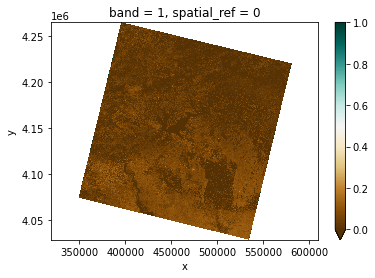

Wall time: 6min 2s


In [6]:
%%time
red_url='https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/173/034/LC08_L1TP_173034_20180711_20180717_01_T1/LC08_L1TP_173034_20180711_20180717_01_T1_B2.TIF'
nir_url='https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/173/034/LC08_L1TP_173034_20180711_20180717_01_T1/LC08_L1TP_173034_20180711_20180717_01_T1_B8.TIF'

from dask.distributed import Client, LocalCluster
import multiprocessing as mp
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray
%matplotlib inline

with LocalCluster(n_workers=int(0.6 * mp.cpu_count()),
    processes=True,
    threads_per_worker=1,
    memory_limit='2GB',
    #ip='tcp://localhost:9895',
) as cluster, Client(cluster) as client:
    red_band = rioxarray.open_rasterio(red_url, masked=True, chunks=(1024,1024))
    nir_band = rioxarray.open_rasterio(nir_url, masked=True, chunks=(1024,1024))
    ndvi = (nir_band.astype(float) - red_band.astype(float))/(nir_band + red_band)
    print(type(ndvi))
    ndvi2d = ndvi.squeeze()
    print(type(ndvi2d))
    plt.figure()
    im = ndvi2d.compute().plot.imshow(cmap='BrBG', vmin=0, vmax=1)
    print(type(im))    
    plt.axis('equal')
    plt.show()

In [11]:
ndvi

<xarray.DataArray (band: 1, y: 7871, x: 7741)>
dask.array<truediv, shape=(1, 7871, 7741), dtype=float64, chunksize=(1, 512, 7741), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 4.265e+06 4.265e+06 ... 4.029e+06 4.029e+06
  * x            (x) float64 3.483e+05 3.483e+05 ... 5.805e+05 5.805e+05
  * band         (band) int32 1
    spatial_ref  int32 0

In [12]:
ndvi2d

<xarray.DataArray (y: 7871, x: 7741)>
dask.array<getitem, shape=(7871, 7741), dtype=float64, chunksize=(512, 7741), chunktype=numpy.ndarray>
Coordinates:
  * y            (y) float64 4.265e+06 4.265e+06 ... 4.029e+06 4.029e+06
  * x            (x) float64 3.483e+05 3.483e+05 ... 5.805e+05 5.805e+05
    band         int32 1
    spatial_ref  int32 0

In [155]:
%%time
import rioxarray
url_landsat='https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/173/034/LC08_L1TP_173034_20180711_20180717_01_T1/LC08_L1TP_173034_20180711_20180717_01_T1_B2.TIF'
nir_landsat='https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/173/034/LC08_L1TP_173034_20180711_20180717_01_T1/LC08_L1TP_173034_20180711_20180717_01_T1_B8.TIF'
red_landsat=rioxarray.open_rasterio(url_landsat)
nir_landsat=rioxarray.open_rasterio(nir_landsat)


Wall time: 7.33 s


In [ ]:
#red=red_landsat.persist()
#nir=nir_landsat.persist()
red=red_landsat.values
nir=nir_landsat.alues


In [ ]:
type(red)

In [148]:
ndvi = (den_nir.astype(float) - den.astype(float))/(den_nir + den)

In [154]:
ndvi.max()

nan

In [ ]:
def to_raster(in_xds, template_xds, out_file):
    in_xds = in_xds.rio.write_crs(template_xds.rio.crs)
    if template_xds.rio.nodata is not None:
        in_xds.attrs["_FillValue"] = template_xds.rio.nodata
    in_xds.rio.to_raster(out_file)

to_raster(red_landsat,ndvi, "landsat-ndvi.tif")

In [14]:
ndvi.rio.write_crs?

Signature: ndvi.rio.write_crs(input_crs=None, grid_mapping_name=None, inplace=False)
Docstring:
Write the CRS to the dataset in a CF compliant manner.

Parameters
----------
input_crs: object
    Anything accepted by `rasterio.crs.CRS.from_user_input`.
grid_mapping_name: str, optional
    Name of the grid_mapping coordinate to store the CRS information in.
    Default is the grid_mapping name of the dataset.
inplace: bool, optional
    If True, it will write to the existing dataset. Default is False.

Returns
-------
:obj:`xarray.Dataset` | :obj:`xarray.DataArray`:
    Modified dataset with CF compliant CRS information.
File:      c:\users\akif\.conda\envs\geo\lib\site-packages\rioxarray\rioxarray.py
Type:      method


In [ ]:
%%time
ndvi=ndvi.compute()
ndvi.rio.to_raster('landsat-ndvi.tif')

In [ ]:
%%time
ndvi.rio.to_raster('landsat-ndvi.tif')

In [ ]:
! rio info  https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/111/111/LC08_L1GT_111111_20181130_20181130_01_RT/LC08_L1GT_111111_20181130_20181130_01_RT_B4.TIF

In [ ]:
dates

In [ ]:
import fasteners

In [ ]:
URL='https://earth-search.aws.element84.com/v0/'
results = satsearch.Search.search(url=URL,
                                  collections=['landsat-8-l1-c1'], # note collection='sentinel-s2-l2a-cogs' doesn't work
                                  datetime=dates,
        )

In [ ]:
Litems=results.items()
Litems.summary()

In [ ]:
bbox

In [ ]:
def get_STAC_items(url, collection, dates, bbox):
    results = Search.search(url=url,
                        collections=[collection], 
                        datetime=dates,
                        bbox=bbox,    
                        sortby=['-properties.datetime']
                           )

    items = results.items()
    print(f'Found {len(items)} Items')
    
    return items

In [ ]:
bbox

In [ ]:
%%time
dates2='2019-01-01/2020-07-12'
bbox2=[26.54827880859375, 36.90378362619561, 45.0067138671875, 42.89219554724437]
landsat=get_STAC_items(url='https://earth-search.aws.element84.com/v0',
                       collection='landsat-8-l1-c1',
                       dates=dates2, bbox=bbox)
#sentinel-s2-l2a-cogs

In [ ]:
type(landsat)

In [ ]:
print(landsat.summary(['date', 'id']))

In [ ]:
Litems=landsat.items()

In [ ]:
print(Litems.summary(['date', 'id']))

In [ ]:
from satstac import Catalog, Collection, Item

cat = Catalog.open('https://landsat-stac.s3.amazonaws.com/catalog.json')
print(cat, cat.filename)

In [ ]:
col = Collection.open('https://landsat-stac.s3.amazonaws.com/landsat-8-l1/catalog.json')
print(col, col.filename)

In [ ]:
cat.

In [ ]:
Catalog?